In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [199]:
df= pd.read_csv("ipl.csv")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Sundaram Ravi,Virender Sharma,Nand Kishore


In [200]:
#Stats for the dataset
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
 17  umpire3          121 non-null    ob

In [202]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [203]:
#checking for any null or na values
df.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              0
umpire2              0
umpire3            635
dtype: int64

In [204]:
#dropping column umpire3
df.drop(columns= {"umpire3"},inplace=True)

In [205]:
#Count of matches every year
season= df["season"].value_counts().sort_index()


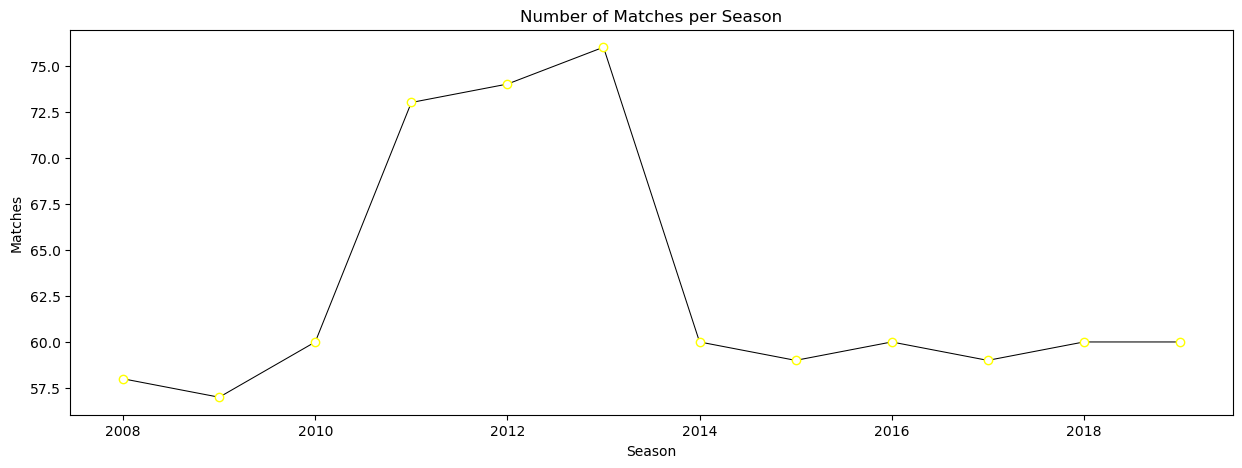

In [206]:
plt.figure(figsize= (15,5))
plt.plot(season.index, season.values, linewidth=0.75, color="black" , marker="o", markerfacecolor="white", mec="yellow")
plt.title("Number of Matches per Season")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.show()

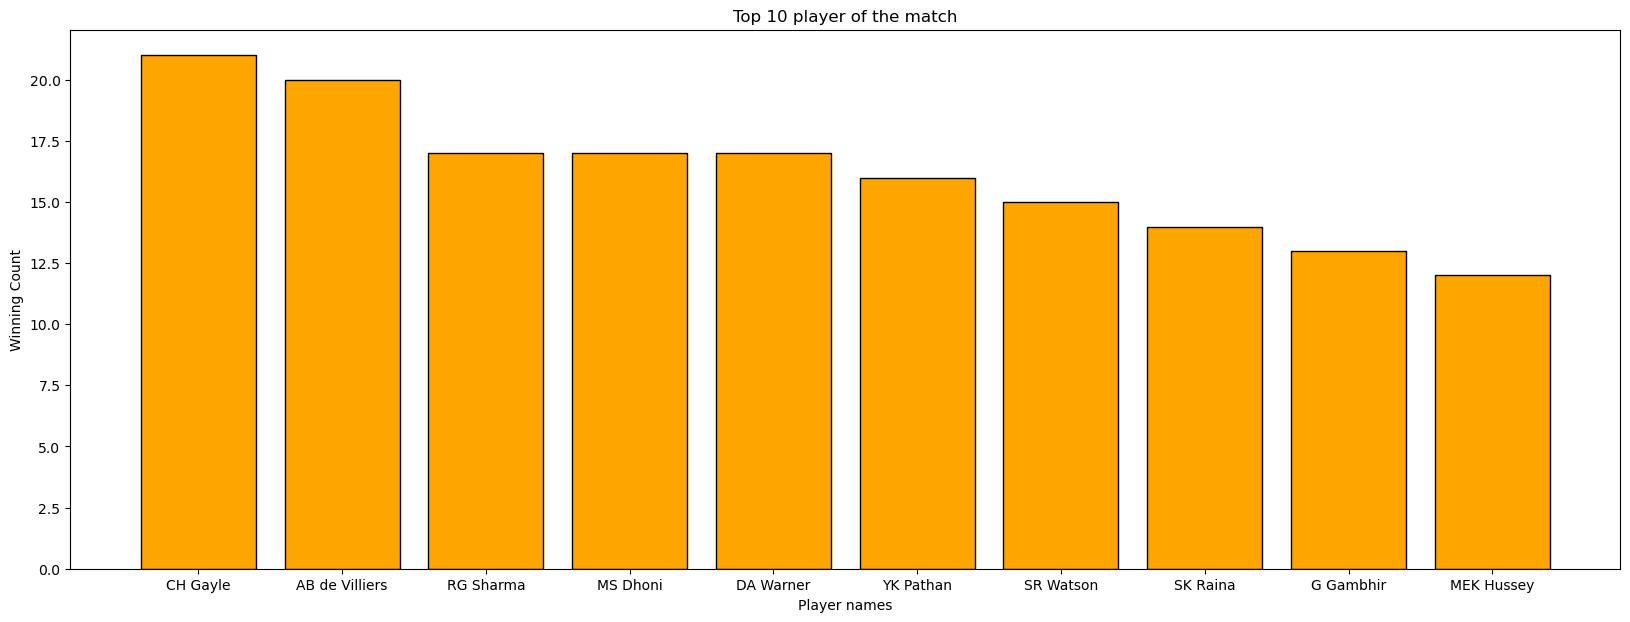

In [207]:
#top 10 player of the match
player= df["player_of_match"].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize= (20,7))
plt.bar(player.index, player.values, edgecolor= "black", facecolor= "orange")
plt.title("Top 10 player of the match")
plt.xlabel("Player names")
plt.ylabel("Winning Count")
plt.show()

In [218]:
df["win_by_runs"].max()

146

In [219]:
df["win_by_wickets"].max()

10

In [208]:
#Number of teams that have won the toss and match
len(df[df["toss_winner"]== df["winner"]])

393

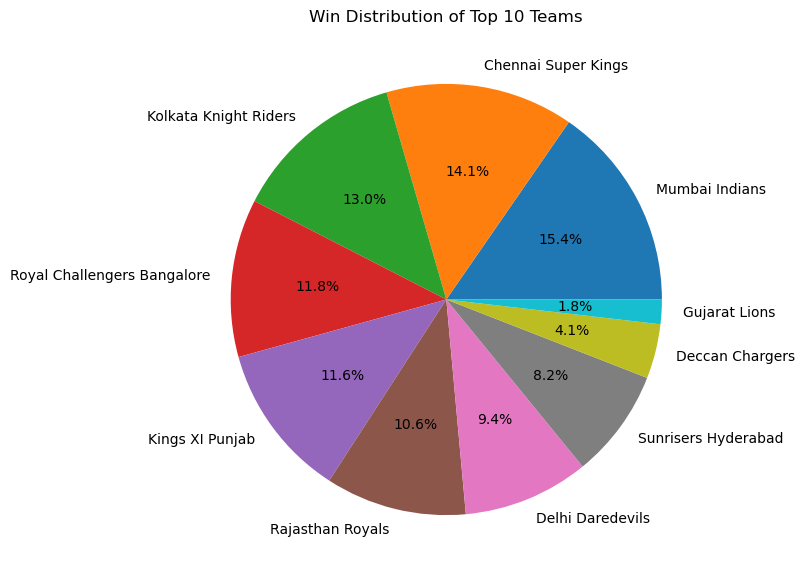

In [209]:
#top 10 teams by winning
top10_winners= df["winner"].value_counts().sort_values(ascending =False)[0:10]
top10_winners.values
plt.figure(figsize= (7,7))
plt.pie(top10_winners.values, labels= top10_winners.index, autopct= "%0.1f%%")
plt.title("Win Distribution of Top 10 Teams")
plt.show()

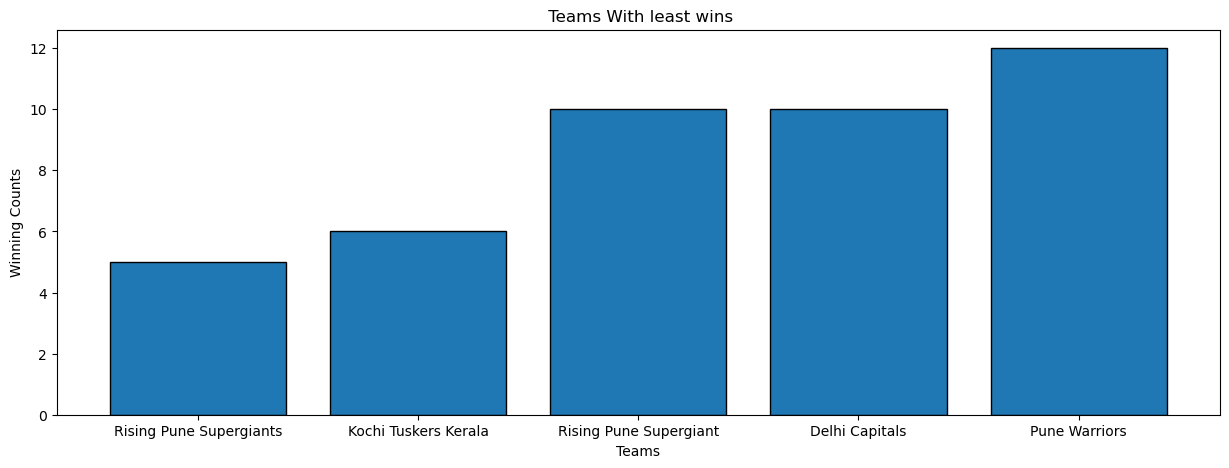

In [210]:
#teams with least wins
won_least_times= df["winner"].value_counts().sort_values(ascending =True)[0:5]
plt.figure(figsize=(15,5))
plt.bar(won_least_times.index, won_least_times.values, edgecolor="black")
plt.xlabel("Teams")
plt.title(" Teams With least wins")
plt.ylabel("Winning Counts")
plt.show()

In [211]:
df["toss_decision"].value_counts()

toss_decision
field    463
bat      293
Name: count, dtype: int64

In [212]:
#toss winner and decided to bat and won the match
len(df[(df["toss_decision"]== "bat") & (df["toss_winner"]== df["winner"])])

134

In [213]:
#toss winner and decided to field and won the match
len(df[(df["toss_decision"]== "field") & (df["toss_winner"]== df["winner"])])

259

In [214]:
#columns of the dataset
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [215]:
#Number of times RCB won the match in Chinnaswamy Stadium
len(df[(df["winner"]== "Royal Challengers Bangalore") & (df["venue"] == "M Chinnaswamy Stadium")])

34

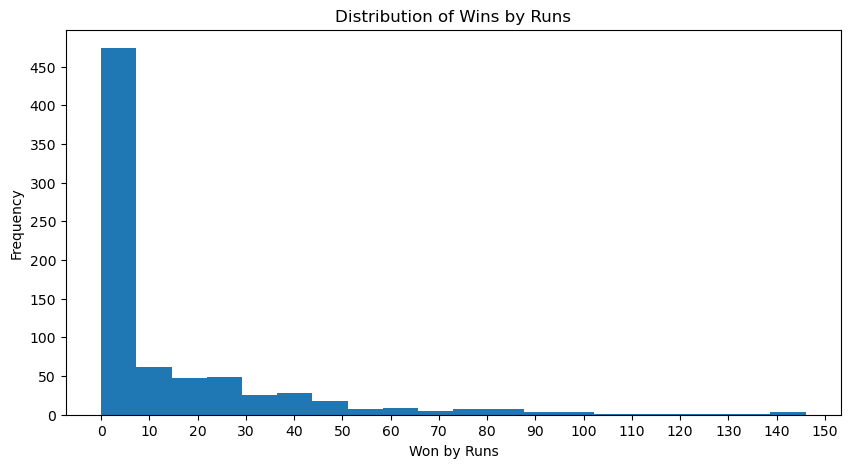

In [237]:
plt.figure(figsize= (10,5))
x_values= [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160]
y_values= [0,50,100,150,200,250,300,350,400,450,500,600]
plt.xticks(x_values)
plt.yticks(y_values)
plt.xlabel("Won by Runs")
plt.ylabel("Frequency")
plt.title("Distribution of Wins by Runs")
plt.hist( df["win_by_runs"], bins=20)
plt.show()

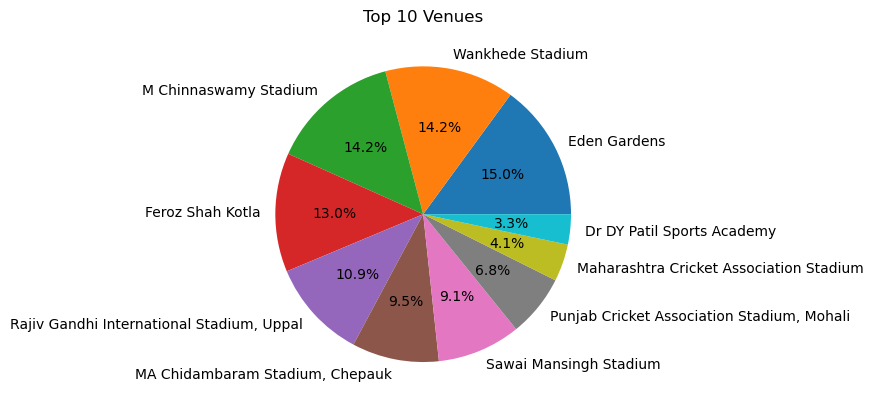

In [216]:
#venues 
df["venue"].value_counts().sort_values(ascending= False).head(10)
plt.pie(df["venue"].value_counts().sort_values(ascending= False).head(10).values, labels= df["venue"].value_counts().sort_values(ascending= False).head(10).index,
        autopct= "%0.1f%%")
plt.title("Top 10 Venues")
plt.show()

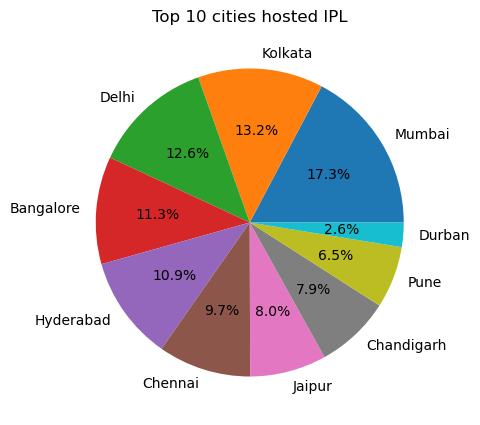

In [217]:
#cities that hosted most number of times
df["city"].value_counts().sort_values(ascending= False).head(10)
plt.figure(figsize= (10,5))
plt.pie(df["city"].value_counts().sort_values(ascending= False).head(10).values, labels= df["city"].value_counts().sort_values(ascending= False).head(10).index,
        autopct= "%0.1f%%")
plt.title("Top 10 cities hosted IPL")
plt.show()